INFO:database.connect:Data loaded successfully from the database.



The optimal number of clusters is: 8 with a K-Means silhouette score of 0.9117193907463387


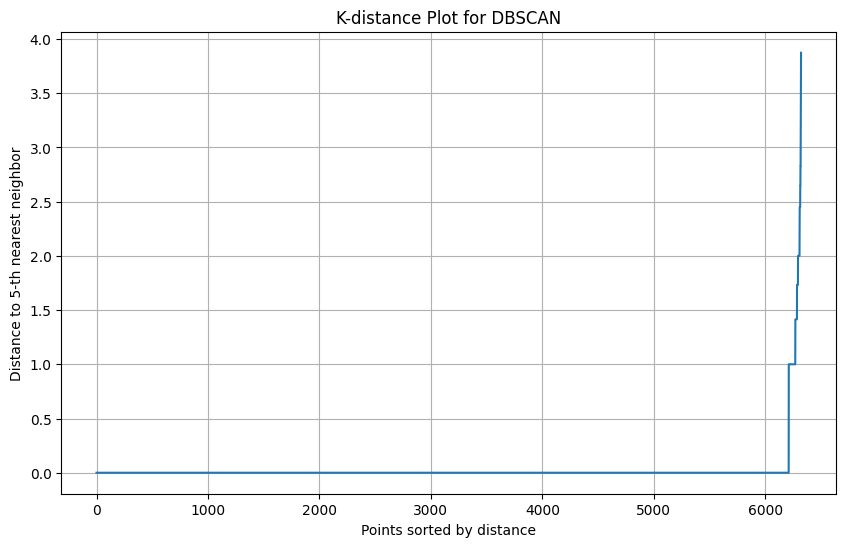

Estimated eps value for DBSCAN: 2.449489742783178
Agglomerative Clustering Silhouette Score: 0.9339387925586804
DBSCAN Silhouette Score: 0.6294835260650776

K-Means Cluster 0:

Number of users in cluster: 511

Common privileges (present in over 50% of users):
Email Authentication             99.804305
IDC-AppDashboard-User            99.804305
Fasit_Forsikredeledige           99.608611
Aebleroed-IIV01-7570             99.608611
ScanJour_Administrator           99.608611
Fasit_Ressourceteam              99.608611
ScanJour_Læse adgang - GRØN      99.608611
ScanJour_Læse adgang - GUL       99.608611
ScanJour_Skrive adgang - GUL     99.608611
ScanJour_Mailling list - GUL     99.608611
ScanJour_Mailling list - RØD     99.608611
ScanJour_Skrive adgang - GRØN    99.608611
ServiceDesk Nyhedsbrev           99.608611
ScanJour_Skrive adgang - RØD     99.608611
ServiceDesk User                 99.608611
Fasit_Fleksjob                   97.260274
dtype: float64

Top 5 privileges in the cluster:
Ema

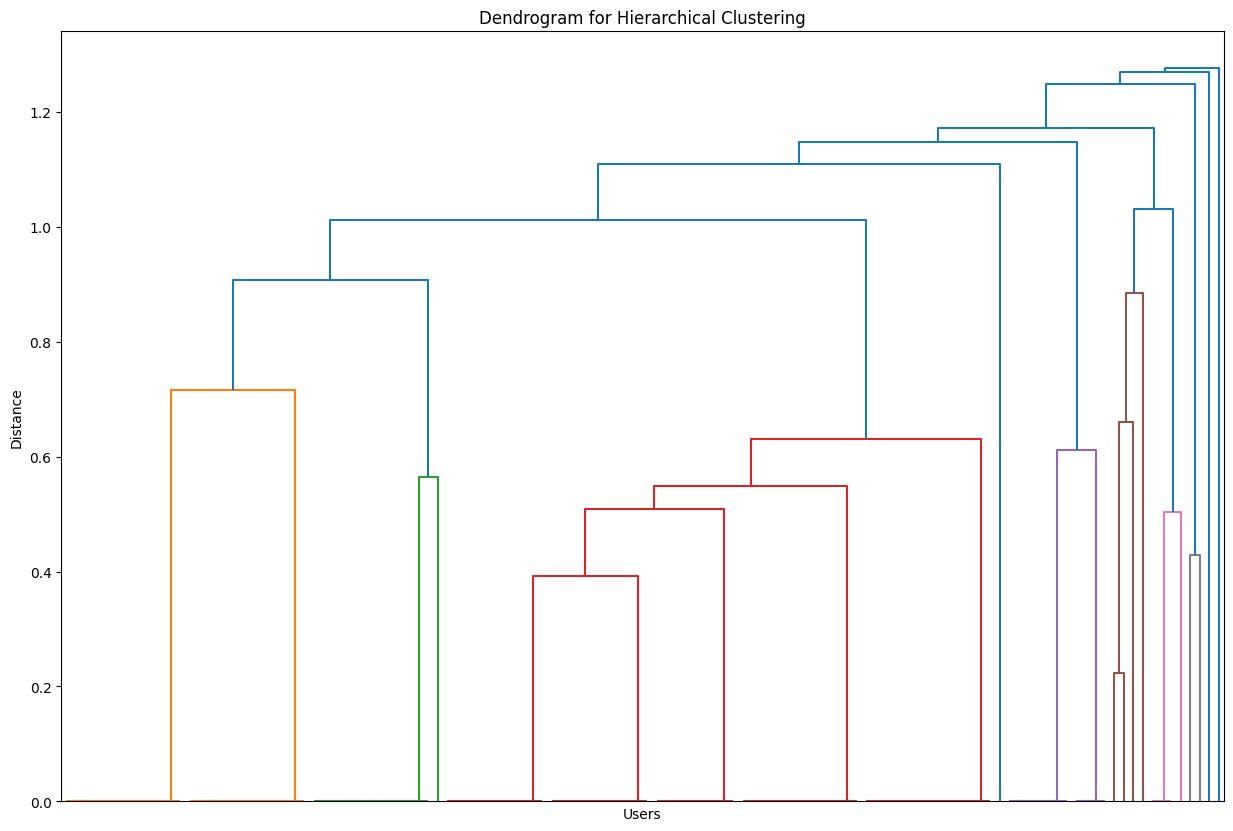

In [2]:
# Main.py
from database.connect import db_name, fetch_data
from clustering.clustering_pipeline import run_pipeline

# Define the SQL query to fetch user roles and system roles from the database
sql_query = f"""
    SELECT 
        urm.user_id,
        sr.name AS system_role_name
    FROM 
        {db_name}.user_roles_mapping urm
    JOIN 
        {db_name}.system_role_assignments sra ON urm.user_role_id = sra.user_role_id
    JOIN 
        {db_name}.system_roles sr ON sra.system_role_id = sr.id;
"""

# Fetch data from the database using the defined SQL query
df = fetch_data(sql_query)

# Run the clustering pipeline with the fetched data
run_pipeline(df)
